<a href="https://colab.research.google.com/github/PetrusAriaa/modeling-and-simulation-project/blob/master/fish_movement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from random import random
from random import randint
from copy import deepcopy as dc

In [ ]:
global EMPTY, NORTH, EAST, SOUTH, WEST, STAY, BORDER

EMPTY = 0
NORTH = 1
EAST = 2
SOUTH = 3
WEST = 4
STAY = 5
BORDER = 6


In [ ]:
class Fish():


  def __init__(self, shape:int, n_fishes:int=10):
    self._shape = shape+2
    self._n_fishes = n_fishes
    self._grid = []


  def generate(self):
    self._grid = BORDER*np.ones((self._shape, self._shape))
    for i in range(1, self._shape-1):
      for j in range(1, self._shape-1):
        self._grid[i][j] = 0
    self._summon()
    return self._grid


  def _summon(self):
    for i in range(1, self._shape-1):
      for j in range(1, self._shape-1):
        if random() <= self._n_fishes/((self._shape-2)**2):
          self._grid[i][j] = randint(0, 4)


  def swim(self, time:int=1):
    n = len(self._grid) - 2
    for t in range(time):
      for i in range(1, n+1):
        for j in range(1, n+1):
          if self._grid[i][j] == NORTH:
            if self._grid[i-1][j] == EMPTY:
              self._grid[i][j] = EMPTY
              self._grid[i-1][j] = np.random.choice([EAST, SOUTH, WEST])
            else:
              self._grid[i][j] = np.random.choice([NORTH, EAST, SOUTH, WEST])
          
          if self._grid[i][j] == EAST:
            if self._grid[i][j+1] == EMPTY:
              self._grid[i][j] = EMPTY
              self._grid[i][j+1] = np.random.choice([NORTH, SOUTH, WEST])
            else:
              self._grid[i][j] = np.random.choice([NORTH, EAST, SOUTH, WEST])

          if self._grid[i][j] == SOUTH:
            if self._grid[i+1][j] == EMPTY:
              self._grid[i][j] = EMPTY
              self._grid[i+1][j] = np.random.choice([EAST, NORTH, WEST])
            else:
              self._grid[i][j] = np.random.choice([NORTH, EAST, SOUTH, WEST])

          if self._grid[i][j] == WEST:
            if self._grid[i][j-1] == EMPTY:
              self._grid[i][j] = EMPTY
              self._grid[i][j-1] = np.random.choice([EAST, SOUTH, NORTH])
            else:
              self._grid[i][j] = np.random.choice([NORTH, EAST, SOUTH, WEST])          
    return self._grid


  def sense(self, food_grid):
    n = self._shape - 2
    for i in range(1, n+1):
      for j in range(1, n+1):
        if self._grid[i][j] != EMPTY:
          site = self._grid[i][j]
          # Nfish = self._grid[i-1][j]
          # Efish = self._grid[i][j+1]
          # Sfish = self._grid[i+1][j]
          # Wfish = self._grid[i][j-1]
          Nfood = food_grid[i-1][j]
          Efood = food_grid[i][j+1]
          Sfood = food_grid[i+1][j]
          Wfood = food_grid[i][j-1]
          sense_dir = [Nfood, Efood, Sfood, Wfood]
          fish_dir = [NORTH, EAST, SOUTH, WEST]
          max_sm = max(sense_dir)
          direction = EMPTY
          if site == EMPTY:
            self._grid[i][j] = direction
            continue
          if max_sm > 1:
            for index in range(4):
              if sense_dir[index] == max_sm:
                direction = fish_dir[index]
            self._grid[i][j] = direction
          else:
            continue
    return self._grid

In [ ]:
class Food:


  def __init__(self, shape:int):
    self._shape = shape + 2
    self._grid = np.zeros((self._shape, self._shape))
    n = self._shape - 2
    #specify pond area
    for i in range(1, n+1):
      for j in range(1, n+1):
        self._grid[i, j] = 1
  
  def dissolve(self):
    n = self._shape-2
    for i in range(1, n+1):
      for j in range(1, n+1):
        if self._grid[i, j] > 1 and self._grid[i, j] != 100:
          smell_level = self._grid[i, j] - 3
          self._grid[i, j] = max(smell_level, 1)
        if self._grid[i, j] == 100 and self._grid[i-1, j] == 1:
          self._grid[i, j] = 1
    return self._grid


  def get_food_grid(self):
    return self._grid
  
  def reset(self):
    self._grid = np.zeros((self._shape, self._shape))
    n = self._shape - 2
    #specify pond area
    for i in range(1, n+1):
      for j in range(1, n+1):
        self._grid[i, j] = 1
    return self._grid

  def feed(self, x_pos, y_pos):
    n = self._shape-2
    RADIUS = 60
    smell_level = .5
    if self._grid[y_pos, x_pos] != 0:
      for r in range(0, RADIUS):
        for i in range(y_pos - r, y_pos + r + 1):
          for j in range(x_pos - r, x_pos + r + 1):
            try:
              if i >= 0 and j >= 0:
                if self._grid[i, j] == 1 or smell_level < self._grid[i, j]:
                  self._grid[i, j] = max(self._grid[i, j]+smell_level, 1)
              else:
                continue
            except:
              continue
      self._grid[y_pos, x_pos] = 100
    return self._grid

(-0.5, 101.5, 101.5, -0.5)

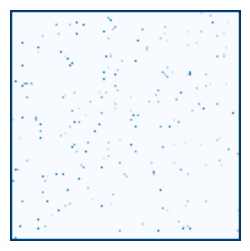

In [ ]:
fish = Fish(100, n_fishes=250)
fish_grid = fish.generate()
fig, ax = plt.subplots(figsize=(3,3))
ax.imshow(fish_grid, cmap='Blues')
ax.axis('off')

In [ ]:
food = Food(100)
food_grid = food.get_food_grid()

In [ ]:
food.feed(30,40)

array([[ 0. ,  0. ,  0. , ...,  0. ,  0. ,  0. ],
       [ 0. , 11.5, 11.5, ...,  1. ,  1. ,  0. ],
       [ 0. , 12. , 12. , ...,  1. ,  1. ,  0. ],
       ...,
       [ 0. ,  1.5,  1.5, ...,  1. ,  1. ,  0. ],
       [ 0. ,  1. ,  1. , ...,  1. ,  1. ,  0. ],
       [ 0. ,  0. ,  0. , ...,  0. ,  0. ,  0. ]])

In [ ]:
food_grid = food.reset()

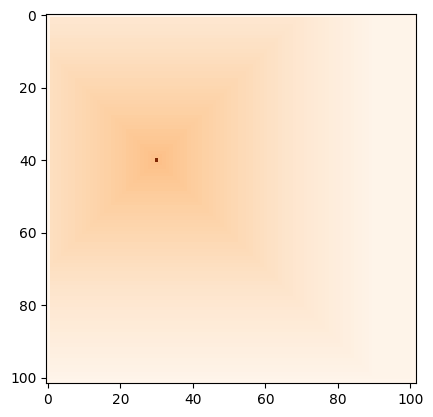

In [ ]:
fig, ax = plt.subplots()
ax.imshow(food_grid, cmap='Oranges')

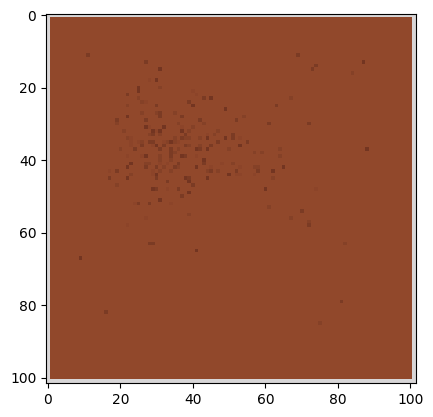

In [ ]:
from matplotlib import animation
from matplotlib.animation import FuncAnimation
fig, ax = plt.subplots()

count = 0
def update(i):
  fish.sense(food_grid)
  fish.swim()
  if i%2 == 0 and i>10:
    food.dissolve()
  if i == 25:
    food.feed(40,40)
  if i == 50:
    food.feed(60,40)
  im = ax.imshow(fish_grid, cmap='Blues')
  im2 = ax.imshow(food_grid, cmap = 'Oranges', alpha=.85)
  return im, im2,

animate = FuncAnimation(fig, update, repeat=True, frames=100, interval=50)

Writer = animation.writers['ffmpeg']
writer = Writer(fps=15, metadata=dict(artist='Me'), bitrate=1800)
animate.save('result.gif', writer=writer)

plt.show()

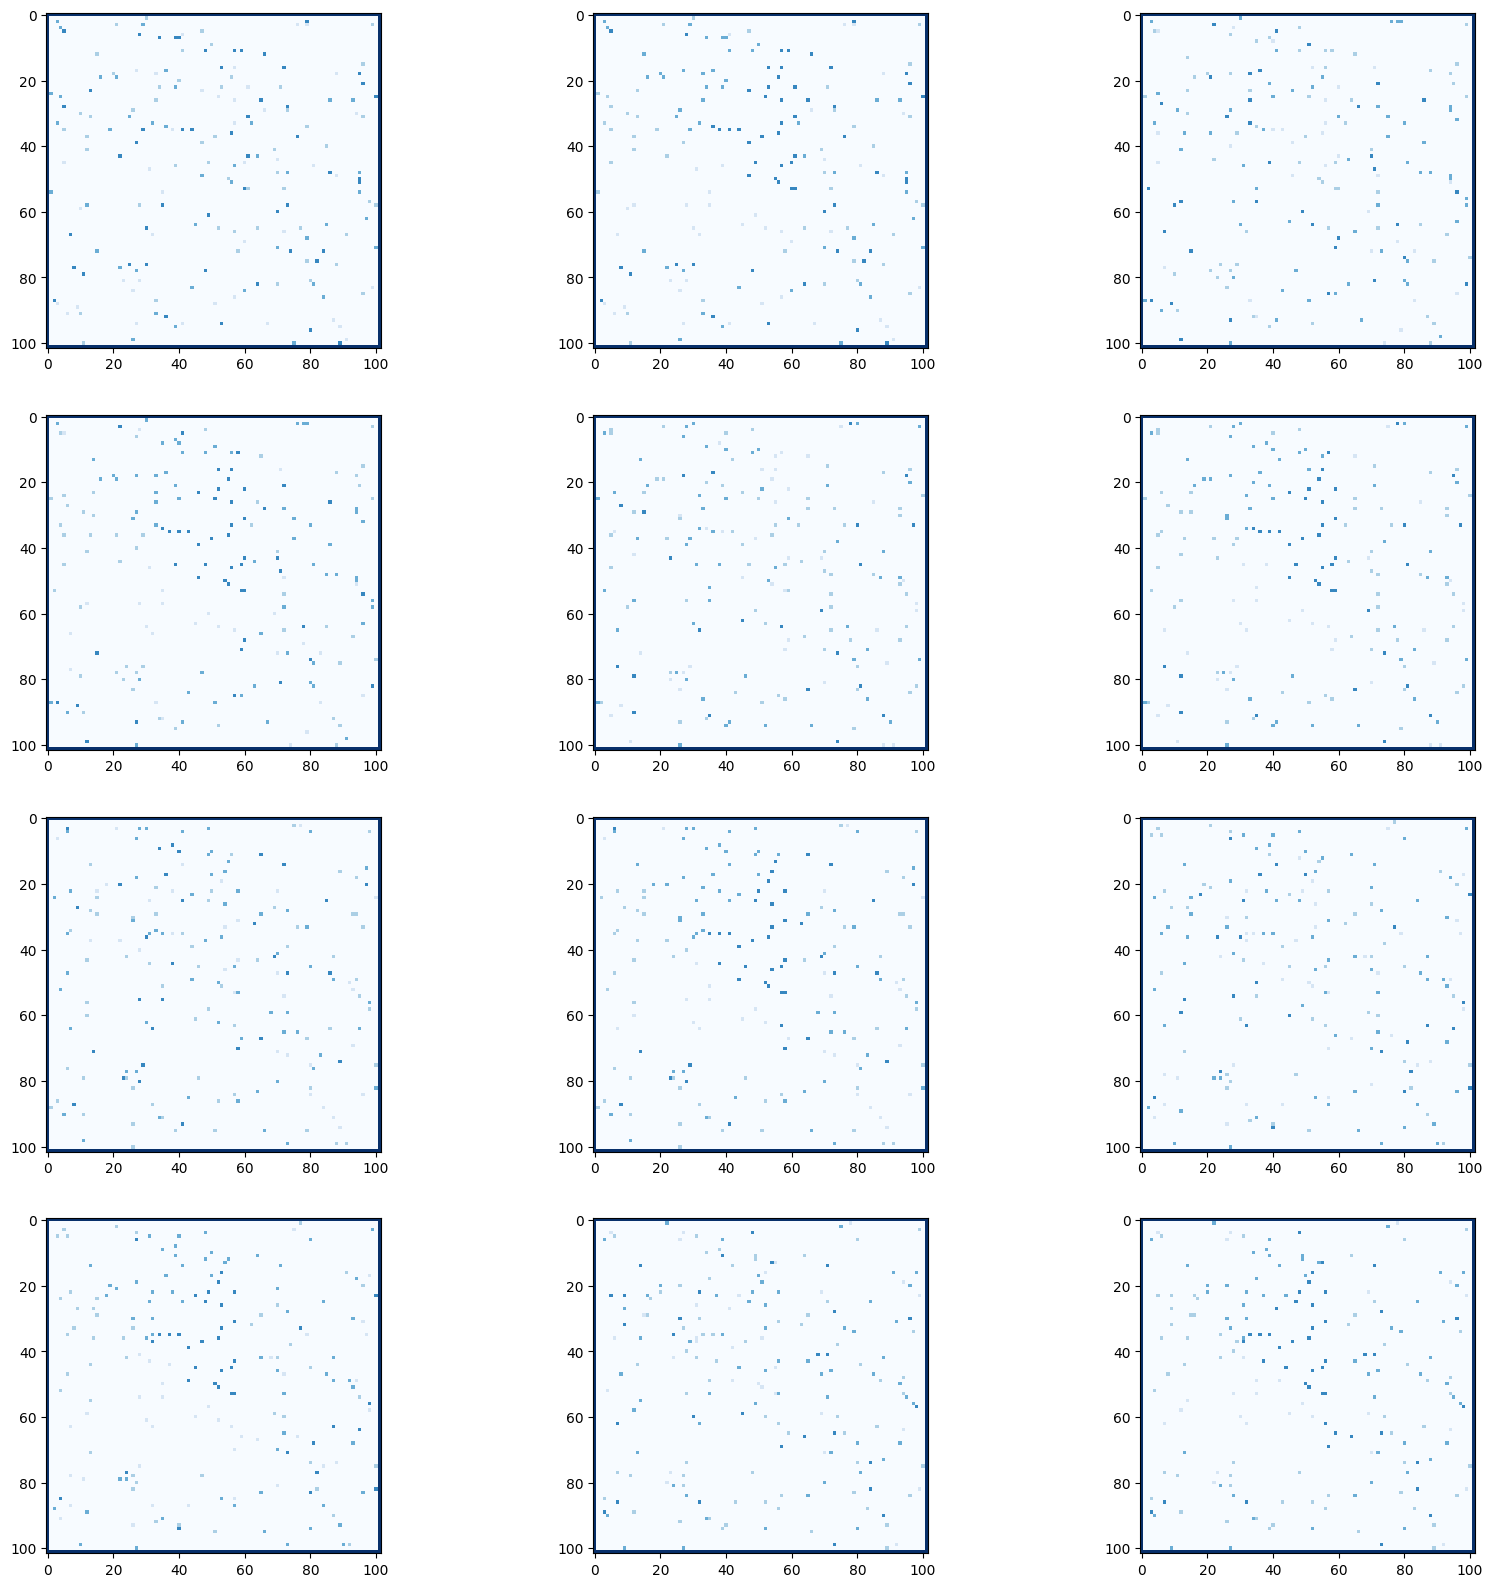

In [ ]:
fig, ax = plt.subplots(nrows=4,ncols=3, figsize=(20,20))
food_grid = food.get_food_grid()
ax[0][0].imshow(fish_grid, cmap='Blues')
ax[0][1].imshow(fish.sense(food_grid), cmap='Blues')
ax[0][2].imshow(fish.swim(), cmap='Blues')
ax[1][0].imshow(fish.sense(food_grid), cmap='Blues')
ax[1][1].imshow(fish.swim(), cmap='Blues')
ax[1][2].imshow(fish.sense(food_grid), cmap='Blues')
ax[2][0].imshow(fish.swim(), cmap='Blues')
ax[2][1].imshow(fish.sense(food_grid), cmap='Blues')
ax[2][2].imshow(fish.swim(), cmap='Blues')
ax[3][0].imshow(fish.sense(food_grid), cmap='Blues')
ax[3][1].imshow(fish.swim(), cmap='Blues')
ax[3][2].imshow(fish.sense(food_grid), cmap='Blues')

In [ ]:
def renderer(fish, food):
  n = len(fish)-2
  _fish = fish
  _food = food
  fish_grids = np.zeros((n+2, n+2, 1))
  fish_grids[:,:,0] = dc(_fish)
  food_grids = np.zeros((n+2, n+2, 1))
  food_grids[:,:,0] = dc(_food)

  return fish_grids, food_grids

In [ ]:
def color_grid(figrid, fogrid):
  n = len(figrid) - 2
  color_grid = np.zeros((n+2, n+2, 3))
  firstEls = 1- dc(fogrid)/50
  color_grid[:, :, 0] = firstEls
  color_grid[:, :, 1] = firstEls
  color_grid[:, :, 2] = firstEls

  for i in range(0, n+2):
    for j in range(0, n+2):
      if (figrid[i, j] == 6):
        color_grid[i, j, 0] = 1
        color_grid[i, j, 1] = 0
        color_grid[i, j, 2] = 0
      elif (figrid[i, j] > 0):
        color_grid[i, j, 0] = 0
        color_grid[i, j, 1] = 0
        color_grid[i, j, 2] = 1
  return color_grid

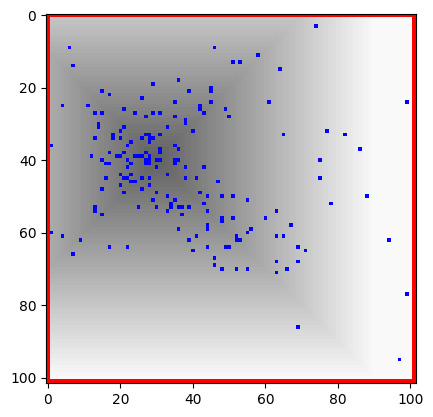

In [ ]:
from matplotlib.colors import Colormap

fish_grids, food_grids = renderer(fish_grid, food_grid)
dsp, ax3 = plt.subplots()
color = Colormap(['Blues', 'Oranges', 'Reds'])
ax3.imshow(color_grid(fish_grids[:,:,0], food_grids[:,:,0]),cmap=color)